<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Copy_of_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [ ]:
#Original notebook
#http://tinyurl.com/yyt9dy5m

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [15]:
#Get the middle 98% manually to check for accuracy in the below cell
(df['price'].sort_values().reset_index()[int(len(df['price']) * 0.01):
                                         (len(df['price']) - int(len(df['price']) * 0.01))])

,index,price
493,33813,1475
494,43299,1475
495,6508,1475
496,9494,1475
497,6115,1475
...,...,...
48854,8924,13000
48855,45990,13000
48856,36927,13000
48857,3441,13000


In [16]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [17]:
#Look at the data. Choose a feature, and plot its relationship with the target.
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


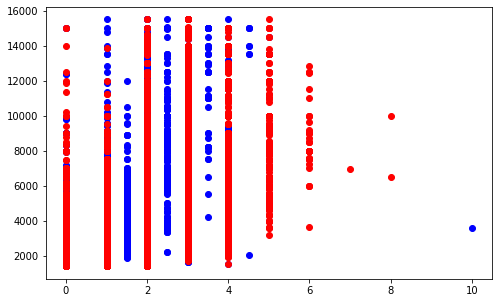

In [19]:
#you'll predict how much it costs to rent an apartment
#Therefore we list target as price and create plots on that
#I think bedrooms will look strongly correlated and bathrooms will be less correlated
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,5))
#We're looking for number of bathrooms as bunched with price
plt.scatter(df['bathrooms'],df['price'],color = 'blue')
#Looking for number of bedrooms as bunched with price
plt.scatter(df['bedrooms'],df['price'],color = 'red')
plt.show();

What's strange here is that all of the features in the dataset apart from latitude and longitude are discrete features, most being true or false, while our target is a continuous variable. Note above in .describe() we can see this for all variables where the min is 0 and the max is 1. Additionally, it looks like neither feature is STRONGLY correlated. We can see that studio apartments, or 0 bedroom apartments are usually a bit cheaper, while more expensive seem to be scattered over the range of prices. Interesting that having 8 bedrooms does not automatically increase the price.

In [50]:
#Use scikit-learn for linear regression with one feature. 
from sklearn.linear_model import LinearRegression
#Instantiate the model with default parameters
model = LinearRegression()
#fit the model, need to reshape X in order to be used by fit
X = np.array(df['bedrooms']).reshape(-1, 1)
#Alternatively, we can pass the parameter as a list, 
#X = df[['bedrooms']]
y = df['price']
model.fit(X,y)
model.score(X,y)

0.2867535453253989

In [32]:
#Here's what that looks like
np.array(df['bedrooms']).reshape(-1, 1)

array([[3],
       [2],
       [1],
       ...,
       [1],
       [0],
       [2]])

In [51]:
#As opposed to 
print(df['bedrooms'].shape)
df['bedrooms']

(48818,)


0        3
1        2
2        1
3        1
4        4
        ..
49347    2
49348    1
49349    1
49350    0
49351    2
Name: bedrooms, Length: 48818, dtype: int64

In [52]:
#As opposed to 
print(df[['bedrooms']].shape)
df[['bedrooms']]

(48818, 1)


,bedrooms
0,3
1,2
2,1
3,1
4,4
...,...
49347,2
49348,1
49349,1
49350,0


In [34]:
#Define a function to make new predictions and explain the model coefficient.
def predictor(model,features):
  '''
  This function takes a model and a feature set, and returns predicted labels

  model is a sklearn model with a 'predict' method 
  features is an array shaped as a feature matrix, ie 1 dimension per observation
  '''

  return model.predict(features)

In [36]:
#What if the number of bedrooms range from 0 to 50,000?
predictor(model,np.arange(len(df)).reshape(-1,1))

array([2.26797415e+03, 3.12122832e+03, 3.97448248e+03, ...,
       4.16538702e+07, 4.16547234e+07, 4.16555767e+07])

In [37]:
#Getting the price for a 50,000 room house
predictor(model,np.array(50000).reshape(-1,1))

array([42664976.35052072])

In [ ]:
#Nice. I bet that's actually way off. That's like, a medium town. Do towns go for 42 million?


##Stretch goals

In [46]:
#Get the X vars for multidimensional linear regression
X = df[['bedrooms','bathrooms']]
X.head(2)

,bedrooms,bathrooms
0,3,1.5
1,2,1.0


In [47]:
#Do linear regression with two or more features.
#Instantiate the model with default parameters
big_model = LinearRegression()
#fit the model, need to reshape in order to be used by fit
big_model.fit(X,df['price'])
big_model.score(X,df['price'])

0.5147421049048967

In [ ]:
#Read The Discovery of Statistical Regression
#Read An Introduction to Statistical Learning, Chapter 2.1: What Is Statistical Learning?

#Intense sweating because I'm illiterate 0_0

Looks like the optimization function for regression is differentiable everywhere, making it good for optimization. Gotta be rough finding out that you didn't invent something, and instead, someone a lot smarter than you invented it, and thought it was so trivial he didn't publish it

Irreducible error occurs because the predicted value or vector Yhat is a function of both our model, which can contain reducible error by getting better data and better modeling, and the error term. As long as our parameters X do not contain useful information from the error term, we will not reduce that error in our prediction

Linear models can be good for inference, but are less accurate for prediction. Non-linear models are better at prediction, but less good for inference. 

A parametric model is a model where you only need to estimate a set of parameters of a function, rather than the whole function itself. This is easier, but might be inaccurate because the parameters might not be the only relevant factor in f. 
Non parametric models make no assumptions about the form of the function, so they can more accurately measure complex functions. Since there are no assumptions, much more data is needed in order to obtain accurate models of f.